# Basic Model Introduction

This page will introduce you to how to build and run a simple compartmental disease model with summer.

We will create a SIR compartmental model for some fictional disease. In this model there will be:

- three compartments: susceptible (S), infected (I) and recovered (R)
- a starting population of 1000 people, with 10 of them infected (and infectious)
- an evaluation timespan from years 1990 to 2010 in 0.1 year steps
- inter-compartmental flows for infection, deaths and recovery

First, let's import the summer library and create a new [CompartmentalModel](/api/model.html) object.

In [1]:
from summer import CompartmentalModel

model = CompartmentalModel(
    times=[1990, 2010],
    compartments=["S", "I", "R"],
    infectious_compartments=["I"],
    timestep=0.1,
)

# View a description of the model compartments
model.compartments

[S, I, R]

## Adding a population 

Initially the model compartments are all empty.

Let's add 990 people to the susceptible compartment, plus 10 in the infectious compartment.

In [2]:
# Add people to the model
model.set_initial_population(distribution={"S": 990, "I": 10})

# View the initial population
model.initial_population

array([990.,  10.,   0.])

## Adding intercompartmental flows 

Now, let's add some flows between the compartments. These flows will define the dynamics of our ficticious disease:

- an infection flow from S to I (using frequency dependent transmission)
- a recovery flow from I to R
- an infection death flow, that impacts people in the I compartment

In [3]:
# Susceptible people can get infected.
model.add_infection_frequency_flow(name="infection", contact_rate=2, source="S", dest="I")

# Infectious people take 3 years, on average, to recover.
model.add_sojourn_flow(name="recovery", sojourn_time=3, source="I", dest="R")

# Add an infection-specific death flow to the I compartment.
model.add_death_flow(name="infection_death", death_rate=0.05, source="I")

# Inspect new flows.
model._flows

[<InfectionFrequencyFlow 'infection' from S to I>,
 <SojournFlow 'recovery' from I to R>,
 <DeathFlow 'infection_death' from I>]

## Running the model

Now we can calculate the outputs for the model over the requested time period. 

The model calculates the compartment sizes by solving a differential equation which is defined by the flows we just added.

In [4]:
model.run()

## Print the model outputs

The model's results are available in a NumPy array named `model.outputs`. 

This array is available after the model has been run. Let's have a look at what's inside:

In [5]:
# Force NumPy to format the output array nicely. 
import numpy as np
np.set_printoptions(formatter={'all': lambda f: f"{f:0.2f}"})

# View the first 20 timesteps of the output array.
model.outputs[:20]

array([[990.00, 10.00, 0.00],
       [987.96, 11.65, 0.34],
       [985.58, 13.56, 0.75],
       [982.82, 15.79, 1.21],
       [979.62, 18.36, 1.76],
       [975.91, 21.34, 2.39],
       [971.62, 24.79, 3.12],
       [966.66, 28.77, 3.98],
       [960.93, 33.36, 4.97],
       [954.34, 38.63, 6.11],
       [946.76, 44.68, 7.44],
       [938.08, 51.60, 8.97],
       [928.16, 59.49, 10.74],
       [916.90, 68.41, 12.78],
       [904.13, 78.49, 15.11],
       [889.66, 89.87, 17.80],
       [873.37, 102.64, 20.86],
       [855.12, 116.86, 24.37],
       [834.83, 132.58, 28.34],
       [812.45, 149.78, 32.84]])

## Plot the outputs

You can get a better idea of what is going on inside the model by visualizing how the compartment sizes change over time.

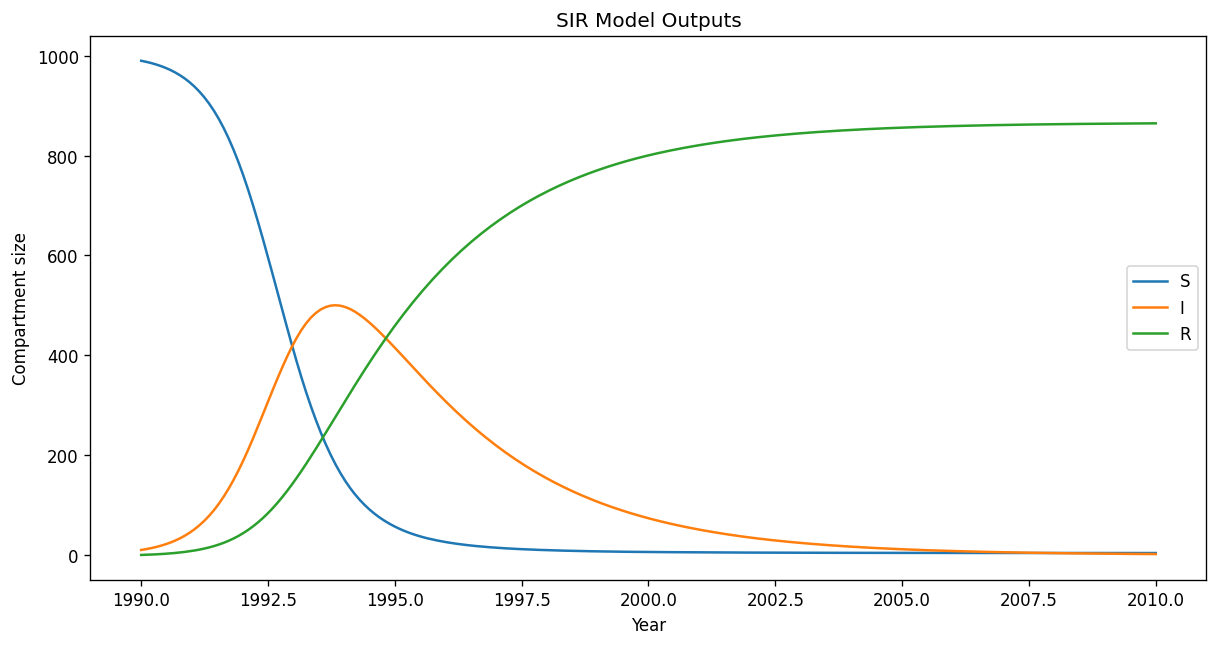

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)

# Add each compartment to the plot.
for i in range(model.outputs.shape[1]):
    ax.plot(model.times, model.outputs.T[i])

ax.set_title("SIR Model Outputs")
ax.set_xlabel("Year")
ax.set_ylabel("Compartment size")
ax.legend(["S", "I", "R"])
plt.show()

## Summary

That's it for now, now you know how to:

- Create a model
- Add a population
- Add flows
- Run the model
- Access and visualize the outputs

A detailed API reference for the CompartmentalModel class can be found [here](http://summerepi.com/api/model.html)